# Problemas de Regressão

Quando precisamos estimar um valor numérico conhecendo certas variáveis, usualmente chamamos de problema de regressão. Alguns exemplos são:

- Estimar o PIB para o próximo ano
- Estimar o preço de um imóvel
- Estimar o valor de abertura de uma ação da bolsa de valores
- Estimar o volume de vendas para o próximo trimestre
- Estimar a temperatura máxima para o próximo dia
- Estimar o score de crédito de um cliente para avaliar empréstimos
- Estimar a demanda de energia elétrica para o próximo mês
- Estimar a nota de uma prova para um aluno
- Estimar o número de ingressos a serem vendidos para um determinado evento
- Estimar a safra de soja para o próximo ano

### Importar as bibliotecas

In [24]:
# libraries

import pandas as pd # data structure
import numpy as np # data sctruture

import matplotlib.pyplot as plt # graphic EDA
import seaborn as sns # graphic EDA

from sklearn.preprocessing import MinMaxScaler # scale
from sklearn.preprocessing import OneHotEncoder # categorical encoder
from sklearn.metrics.pairwise import rbf_kernel # numeric transformation
from sklearn.model_selection import train_test_split # split train and test
from sklearn.linear_model import LinearRegression # model
from sklearn.ensemble import RandomForestRegressor # model
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error # metric

### Carregar os dados

In [2]:
# Get data
# https://github.com/ageron/handson-ml/tree/master/datasets/housing
df = pd.read_csv('../datasets/housing.csv')

### Explorar as 5 primeiras linhas

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Cada linha representa as características de um distrito do estado da Califórnia;
- Dentre as características estão, localização (latitude e longitude), número total de quartos, número total de salas, população, número de casas, renda mediana da população, valor mediano de uma casa e proximidade com o oceano;
- São 10 colunas na tabela;
- A coluna de interesse é a <i>median_income</i>

### Verificar dados faltantes e consumo de memória

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Há 20640 linhas na tabela;
- A coluna <i>total_berooms</i> possui dados faltantes
- A coluna de proximidade do oceano é categórica e todas as outras colunas não numéricas
- Utilizaremos 1.6MB para armazenas a tabela na memória

### Pré exploração de variáveis categóricas

In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

- São 5 categorias de proximidade do oceano;
- A categoria mais frequente é "<1H OCEAN" com 9136 unidades amostrais. Isto é 9136 distritos estão a menos de uma hora do oceano;
- A categoria menos frequente é "ISLAND" com 5 unidades amostrais. Logo, 5 distritos estão em ilhas;

### Pré exploração de  variáveis numéricas

In [6]:
# summary of simples statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


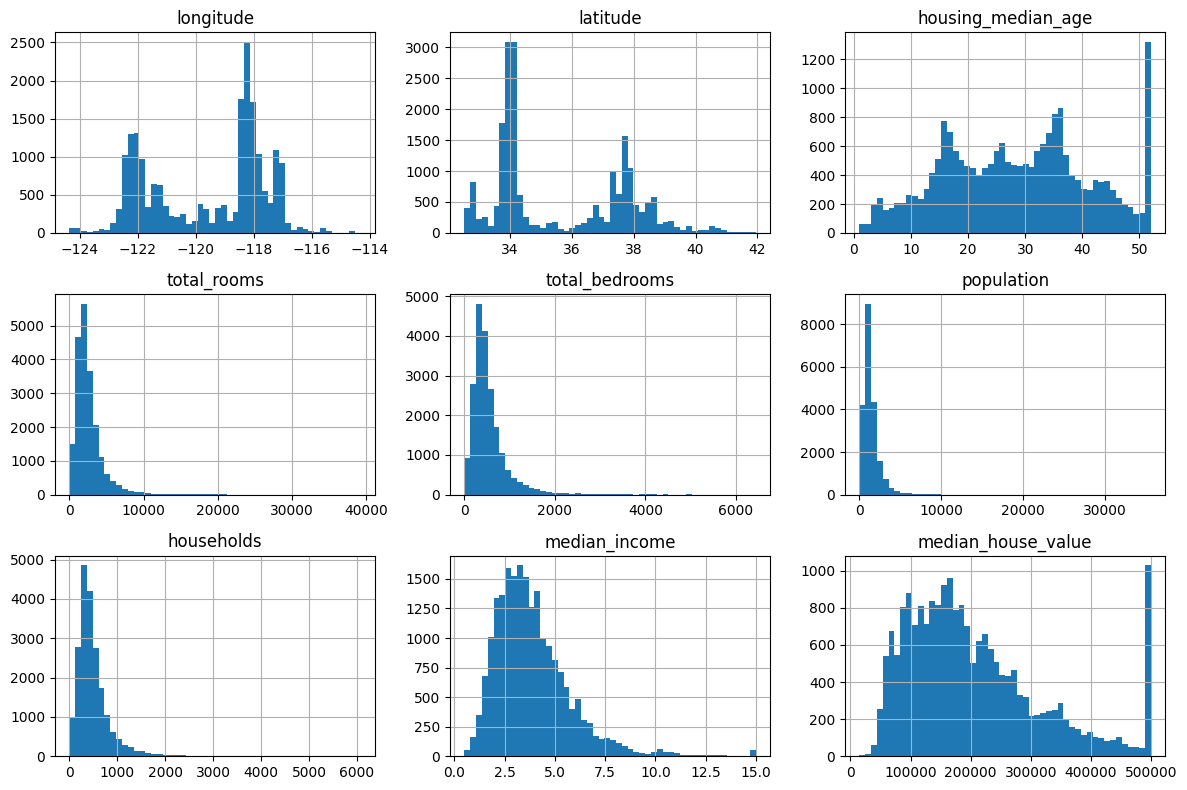

In [7]:
# histogram to univariated analysis
df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

- O preço mediano não faz sentido em dólares. Segundo o livro texto, as escalas foram alteradas de 10000 para 1. Logo o preço mediano é de 35 mil dólares.
- Segundo o livro texto, os valores de idade média e preço médio foram limitados durante o censo. Essas limitações podem ser refletidas no resultado final.
- Por fim, a maioria dos histogramas mostram uma distribuição assimétrica a esquerda, tal fato pode prejudicar o ajuste de tipos específicos de modelos.

### EDA

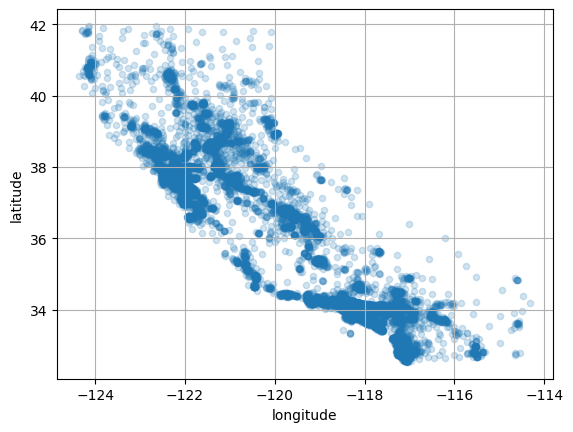

In [8]:
# latitude and longitude
df.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

- Latitudes e longitudes dos distritos estão distribuídos de maneira significativamente densa no estado da Califórnia, esta afirmação pode ser confirmada pelo gráfico acima que lembra o mapa do estado da Califórnia.

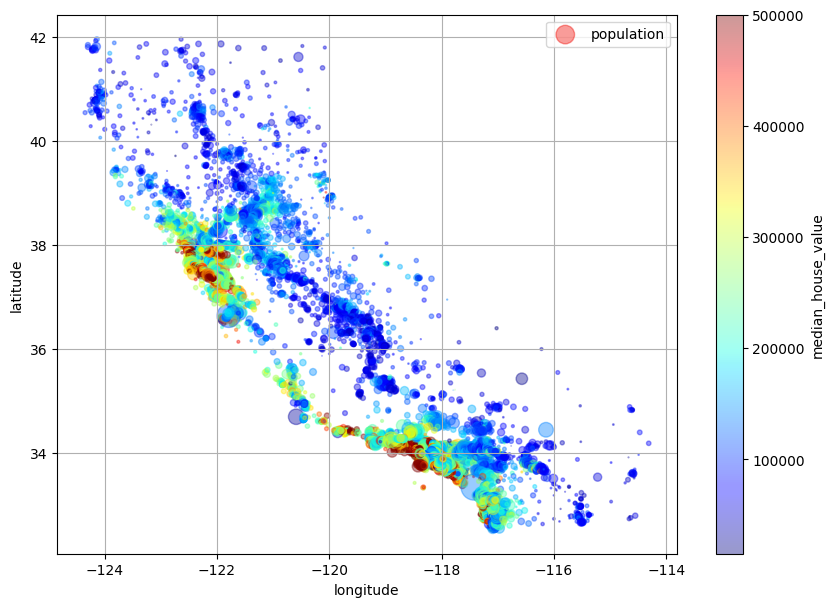

In [9]:
# latitude, longitude, population and median_house_value
scaled_population = df["population"] / 100
df.plot(
    kind="scatter", x="longitude", y="latitude", grid=True,
    s = scaled_population, label="population",
    c="median_house_value", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7),alpha=0.4)
plt.show()

- Distritos mais populosos e mais próximos ao oceano possuem maior valor mediano de casas

In [10]:
# correlations with median_house_value
corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

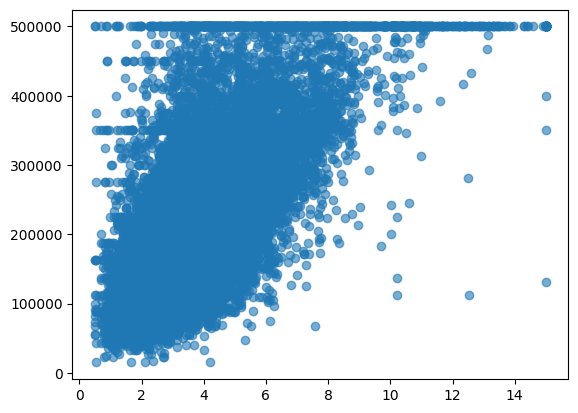

In [11]:
# correlações
plt.scatter(df['median_income'], df['median_house_value'], alpha=0.6)
plt.show()

- Há uma correlação de 0.68 entre o valor mediano de uma casa e a renda mediana da população.
- Valores muito próximos de zero significam que não há forte correlação linear entre as variáveis.
- Retas horizontal aparecem em torno de $450,000, e $350,000. Talvez devéssemos remover esses valores para melhor ajuste do modelo

In [12]:
# correlações com variáveis novas
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df["people_per_house"] = df["population"] / df["households"]

corr_matrix = df.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

- A nova variável <i>rooms_per_house</i> teve maior correlação que <i>total_rooms</i>
- A nova variável <i>bedrooms_ration</i> é mais informativa que <i>total_bedrooms</i>

### Modelagem completa com modelo linear

In [31]:
# read data
df = pd.read_csv('../datasets/housing.csv')

# imputation (better with imputer class)
median = df["total_bedrooms"].median() 
df["total_bedrooms"].fillna(median, inplace=True)

# new features
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df.drop('total_rooms', axis=1, inplace=True)
df.drop('total_bedrooms', axis=1, inplace=True)

# transform (better before scaling)
# quão similar é do 35 exp(–γ(x – 35)²)
df['housing_median_age'] = rbf_kernel(df[["housing_median_age"]], [[35]], gamma=0.1)

# handle categorical values
cat_cols = df[['ocean_proximity']]
encoder = OneHotEncoder() # other option: OrdinalEncoder
sparse_cat_cols = encoder.fit_transform(cat_cols) 
df_cat = pd.DataFrame(sparse_cat_cols.toarray(), columns=encoder.categories_[0])
df = df.join(df_cat)
df.drop('ocean_proximity', axis=1, inplace=True)

# scaling (other option: Standard Scaler)
# Ambos minMax e Standard são ruins se temos "cauda pessada"
# podemos categorizar e depois usar one-hot encode
for col in df.columns:
    if col not in ['median_house_value']:
        min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
        df[col] = min_max_scaler.fit_transform(df[[col]])

# Stratify before split train and test
df["income_cat"] = pd.cut( # ensure that the test set is representative
    df["median_house_value"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

# split train and test with stratification
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["income_cat"], random_state=42)

# now, remove the income_cat feature
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

# get features and target to train model
X_train = strat_train_set.drop("median_house_value", axis=1) # features
y_train = strat_train_set["median_house_value"] # target

# select model
model = LinearRegression()

# train model
model.fit(X_train, y_train)

# get features and target to test model
X_test = strat_train_set.drop("median_house_value", axis=1)
y_test = strat_train_set["median_house_value"]

# get prediciont on test
y_pred = model.predict(X_test)

# evaluate model
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)
mae = mean_absolute_error(y_test, y_pred)
print("MAE", mae)

MAPE: 0.28358976155984467
MAE 49606.20439680233


### Modelagem completa com Random Forest

In [30]:
# read data
df = pd.read_csv('../datasets/housing.csv')

# removing missing (better with imputer)
median = df["total_bedrooms"].median() 
df["total_bedrooms"].fillna(median, inplace=True)

# new features
df["rooms_per_house"] = df["total_rooms"] / df["households"]
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]
df.drop('total_rooms', axis=1, inplace=True)
df.drop('total_bedrooms', axis=1, inplace=True)

# transform (better before scaling)
# quão similar é do 35 exp(–γ(x – 35)²)
df['housing_median_age'] = rbf_kernel(df[["housing_median_age"]], [[35]], gamma=0.1)

# handle categorical values
cat_cols = df[['ocean_proximity']]
encoder = OneHotEncoder() # other option: OrdinalEncoder
sparse_cat_cols = encoder.fit_transform(cat_cols) 
df_cat = pd.DataFrame(sparse_cat_cols.toarray(), columns=encoder.categories_[0])
df = df.join(df_cat)
df.drop('ocean_proximity', axis=1, inplace=True)

# scaling (other option: Standard Scaler)
# Ambos minMax e Standard são ruins se temos "cauda pessada"
# podemos categorizar e depois usar one-hot encode
for col in df.columns:
    if col not in ['median_house_value']:
        min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
        df[col] = min_max_scaler.fit_transform(df[[col]])

# Stratify before split train and test
df["income_cat"] = pd.cut( # ensure that the test set is representative
    df["median_house_value"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5])

# split train and test with stratification
strat_train_set, strat_test_set = train_test_split(
    df, test_size=0.2, stratify=df["income_cat"], random_state=42)

# now, remove the income_cat feature
strat_train_set.drop("income_cat", axis=1, inplace=True)
strat_test_set.drop("income_cat", axis=1, inplace=True)

# get features and target to train model
X_train = strat_train_set.drop("median_house_value", axis=1) # features
y_train = strat_train_set["median_house_value"] # target

# select model
model = RandomForestRegressor()

# train model
model.fit(X_train, y_train)

# get features and target to test model
X_test = strat_train_set.drop("median_house_value", axis=1)
y_test = strat_train_set["median_house_value"]

# get prediciont on test
y_pred = model.predict(X_test)

# evaluate model
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape)
mae = mean_absolute_error(y_test, y_pred)
print("MAE", mae)

MAPE: 0.06591287252273356
MAE 11716.435248909884


## Exercícios

Faça uma submissão de uma solução no site Kaggle para o seguinte problema:

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview